<h1 style="color : green"> Bengaluru House Prediction</h1>

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)

In [76]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [77]:
#shows number of rows and columns
df1.shape

(13320, 9)

In [78]:
# The groupby function in Pandas is a tool that helps you organize data into groups 
# based on certain criteria, like the values in a column.

#the below line means, groupby area_type and count area_type
result = df1.groupby('area_type')['area_type'].agg('count')
display(result)

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [79]:
# Removing some columns, that are not necessary okey

# Drop specified labels from rows or columns (axis 0 means rows, and axis = 1 means columns)
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [80]:
# Data Cleaning
# checking the number of NA/Null examples

# The output of df.isnull().sum() is a Pandas Series
# where the index represents the column names of the
# original DataFrame and the values represent the count of
# null values in each respective column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [81]:
# Dropping off the null/NA examples

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [82]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [83]:
# Since hamare pass 2bhk bhi hai and also 2 bedroom, both means same

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

The apply() method in Pandas is a versatile function used to apply a custom or built-in function along an axis of a DataFrame or to each element of a Series. Its primary purpose is to enable flexible data transformations and manipulations that might not be directly available through vectorized Pandas operations.

 Lambda Function: Its primary work involves applying custom logic or transformations to data without the need for formally defining a separate function.

In [84]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))

C:\Users\Baba_\AppData\Local\Temp\ipykernel_12212\3176993600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))


In [85]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [86]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

How do we have a 43 bedroom(bhk)

In [87]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


how come 43 bedroom is fitted in 2400sq_ft??? It's like a error

In [88]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

1133 - 1384  we got range in total Sqft

i need in single digit number

In [89]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# What happens is that in try block "x" a number tries to convert a value in float
# if it can be converted in float its good and returns true, but if its something like
# a range of value like in total_sqft 1133-1145 and all, it goes to except block and returns false

In [90]:
# we apply "~" at the start to look for values that have been 
# returned false in the "is_float" func

df3[~df3['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


we get values in total_sqft like perch, Sq. Meter, and ranges, and all like unstructured and stuffs, not clean

In [91]:
#  Cleaning values like these
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        range_sum = float(token[0])+float(token[1])
        avg = range_sum/2
        return avg
    

    try:
        return float(x)
    except:
        return None

In [92]:
# Sample Run
convert_sqft_to_num('3156Sq.mt')

In [93]:
# .copy() does a deep copy of original dataframe
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(lambda x:convert_sqft_to_num(x))
df4.head(15)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


checking if value at index 30 which was before an range of sqft number 

In [94]:
df4.loc[30]

# Yes, its now a single valued

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<p style="color: yellow;">Data Cleaning is Done.</p>

<p style = "color: yellow;"> Adding Feature Engineering. </p>

In the world of data science and machine learning, feature engineering is the crucial process of transforming raw data into a format that best represents the underlying problem to the predictive models. It's about creating meaningful input variables, known as features, that help machine learning algorithms learn and make accurate predictions

In [95]:
df5 = df4.copy()

# Adding a feature for price per sqft(since we have price in lakhs in our dataset)
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [96]:
len(df5['location'].unique())

1304

We have a total of 1304 locations, which are too much

In [97]:
df5['location'] = df5['location'].apply(lambda x: x.strip())
# df5.head()

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

making a threshold where if there is less than 10 houses, we mark them as other_loc

In [98]:
# df6 = df5.drop('other_location',axis=1)
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [99]:
len(location_stats[location_stats<=10])


1052

In [100]:
location_less_than_10 = (location_stats[location_stats<=10])
location_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [101]:
len(df5.location.unique())

1293

In [102]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [103]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Done with Feature Engineering

<p style="color:yellow;">Outliner Removal:</p> 

Data that are valid but still are in extreme value, which are sometimes considered as good to remove, which might create issue later up ahead.

In [104]:
# what should be the typical sqft per bedrrom --- around 300
# so we create a threshold of 300/bedroom

df5[df5.total_sqft/df5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [105]:
df5.shape

(13246, 7)

In [106]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [107]:
df6.shape

(12502, 7)

The describe() method in Pandas generates descriptive statistics of DataFrame columns which provides key metrics like mean, standard deviation, percentiles and more.

In [108]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The mean is the average of a data set, representing its central value, while the standard deviation measures the dispersion or spread of data points around that mean. 

In [109]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        stdev = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-stdev)) & (subdf.price_per_sqft <=(m + stdev))]
        df_out  = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliners(df6)
df7.shape

(10241, 7)

so we approximately remove 2000 outliners for price per sqft outliners

 sometimes, in the same location for the 1bhk costs 30lakhs but the 2 bhk costs 20lakhs, 2bhk costs 1cr and 3 bhk costs 80lakhs in the same location.
 So we remove this also...


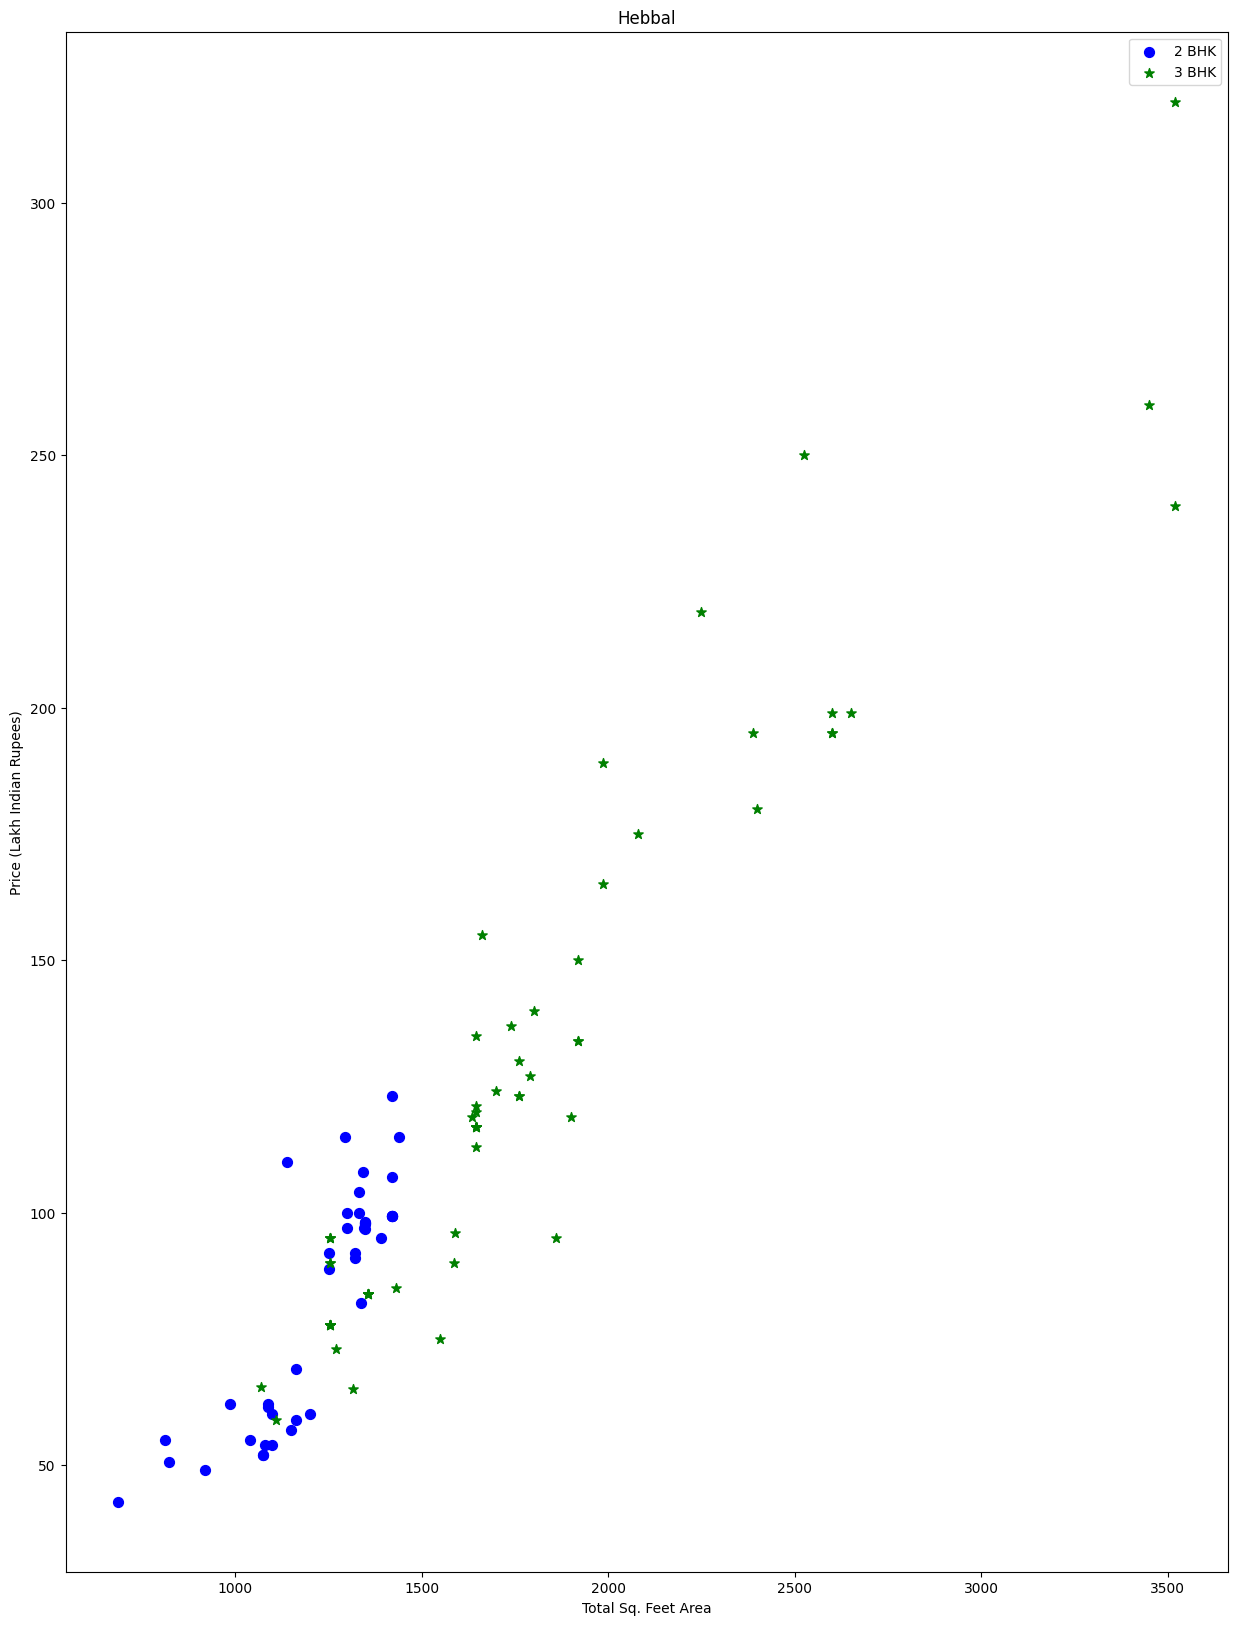

In [110]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,20)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '*', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Sq. Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, 'Hebbal')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {

        'mean': 4000,

        'std: 2000,

        'count': 34

    },

    '2' : {

        'mean': 4300,

        'std: 2300,

        'count': 22

    },    

}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [111]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

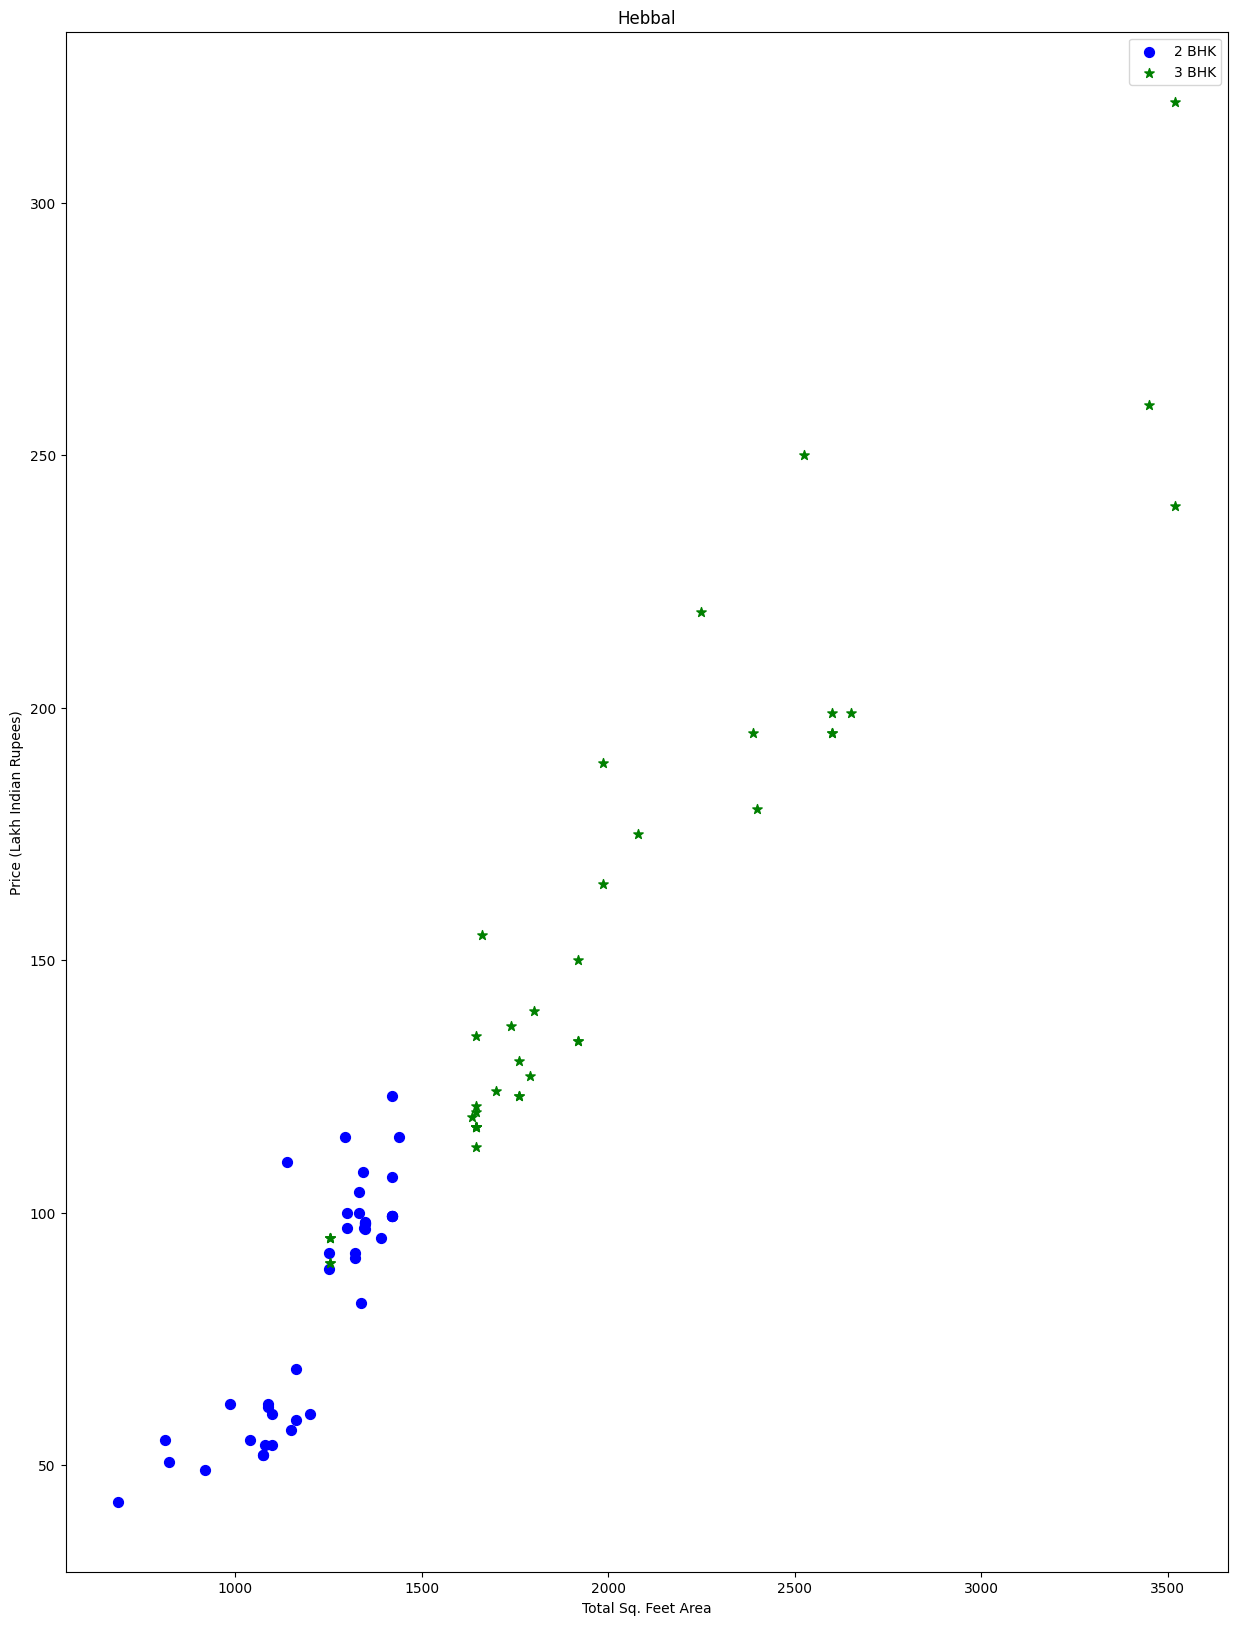

In [112]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

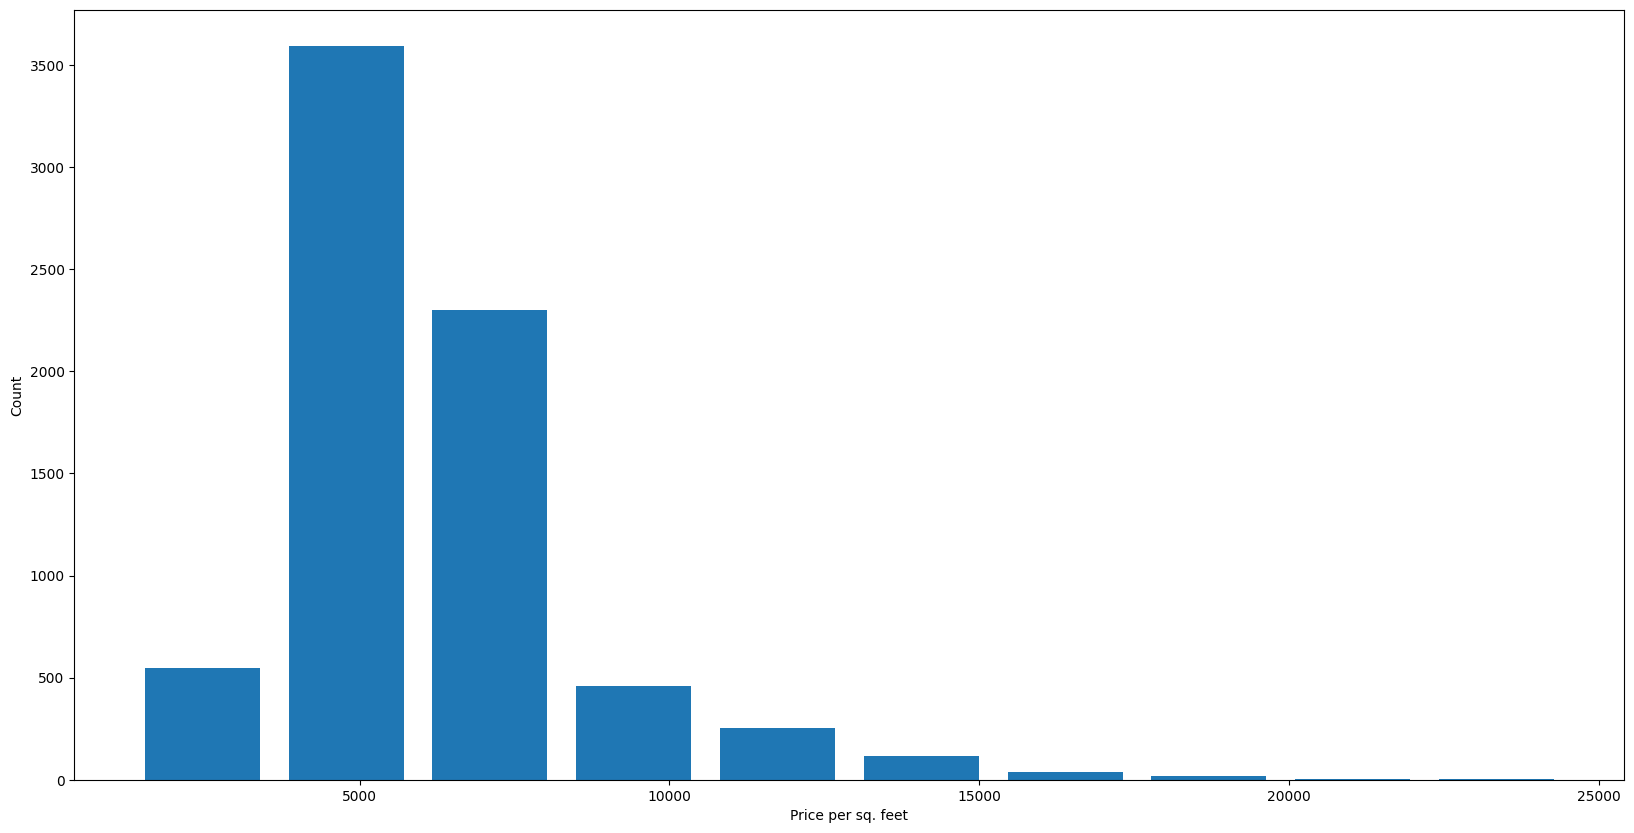

In [113]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sq. feet")
plt.ylabel("Count")

In [114]:
#  Lets dive to look abnormalities in number of Bathrooms

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [115]:
# theres 10, 13 bathrooms 

df8[df8.bath>=10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

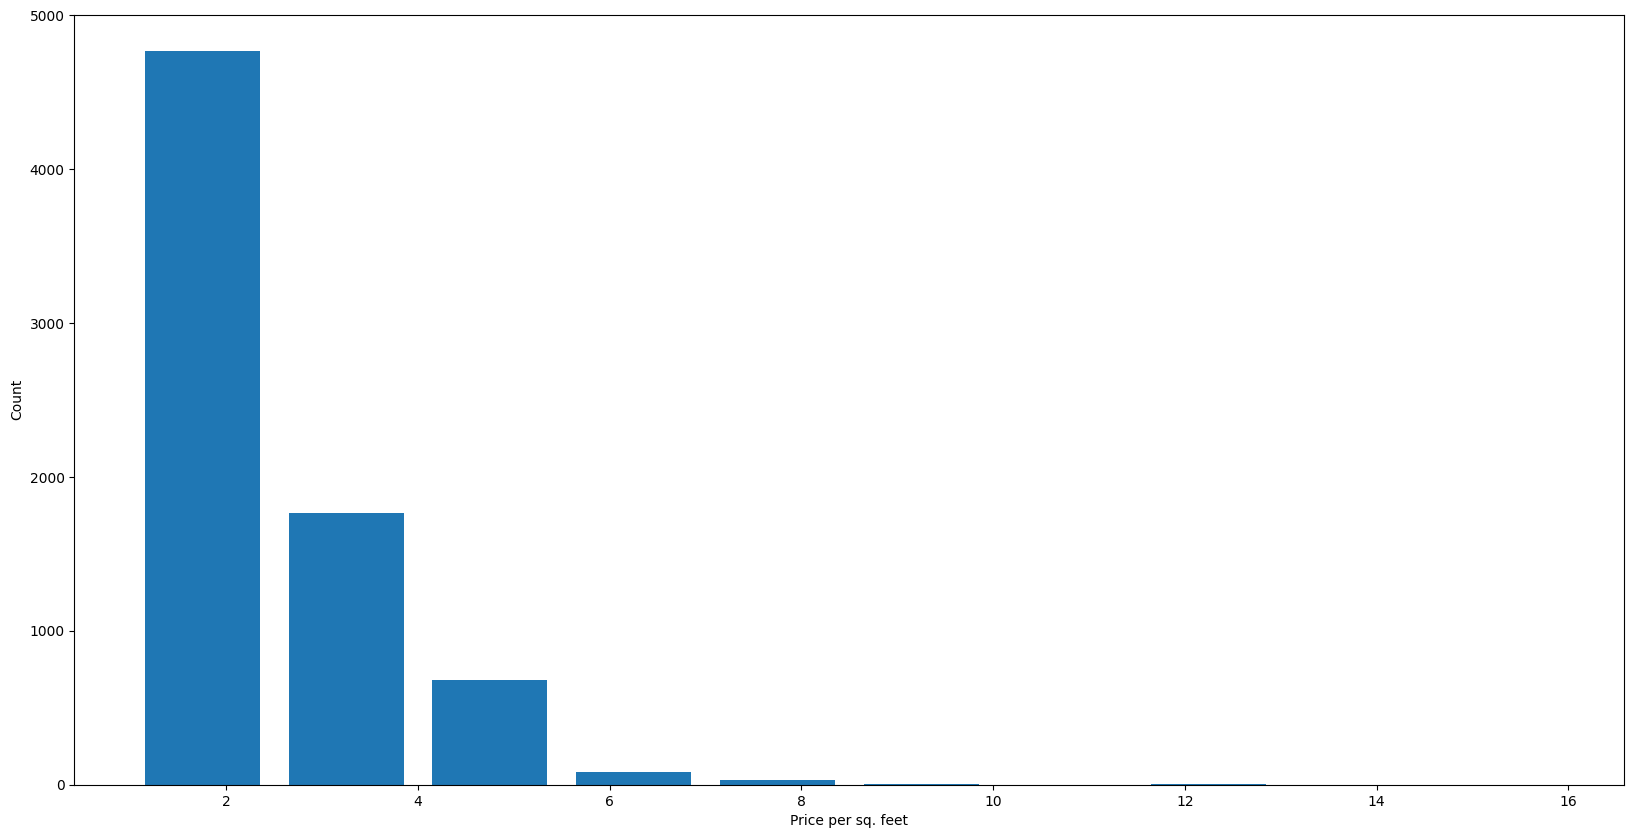

In [116]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Price per sq. feet")
plt.ylabel("Count")

In [117]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [118]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

 Now the Outliners are removed, the next thing is that we remove the unnecessary columns like size(since we already have bhk), and price_per_sqft(we only made it for outliner removal) -->

In [119]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


<h2 style = "color: yellow";> Model Building </h2>

In [120]:
# We have to convert Text column(Categorical) into Numerical Column, 
# We can do this by One_Hot_Encoding aka dummies

dummies = pd.get_dummies(df10.location, columns=['Category'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
# Now I want to concat two dataFrames into One using columns(axis = 1 or axis = 'columns)

df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


So now i have all locations in dummy_encoded, so they are represented in numbers. So i dont need the location column. So i remove it

In [122]:
df12 = df11.drop('location', axis =1)
df12.head(10)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,413.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2450.0,4.0,368.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1875.0,3.0,167.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1500.0,5.0,85.0,5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2065.0,4.0,210.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
# here "X" is our Input and "y" is the actual output
# House Prediction Problem, Y is the price, X is the inputs(like location, sqft, bath, and bhk)

x = df12.drop('price', axis = 1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Now we will be diving our dataset into training and testing set 

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.2, random_state=10)

# 20 for testing and 80 for training

In [126]:
from sklearn.linear_model import LinearRegression

lr_clf  = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8452277697874349

# Understanding Cross-Validation with ShuffleSplit

A simple guide to evaluating machine learning models reliably.

---

## The Goal: Honestly Grade Your Model

Imagine your machine learning model is a student. To know how well they've actually learned a subject (your data), you need to test them properly.

**Cross-validation** is a technique to give your model *multiple, different exams* to get a fair and stable grade, rather than relying on a single exam where they might have gotten lucky.

---

## The Problem: Why a Single Test Isn't Enough

A common approach is to split your data just **once**:
- 80% for **training** (the study material)
- 20% for **testing** (the final exam)

**The risk:** You might get lucky! The 20% of data chosen for the test could be unusually easy, giving you a high score that doesn't reflect the model's true ability. Or, it could be unusually hard, giving a misleadingly low score.

---

## The Solution: `ShuffleSplit` Cross-Validation

Instead of one exam, we conduct several. We repeatedly **shuffle** the entire dataset and create a **new** training/testing split for each exam. This gives us a much more reliable average score.

### Code Breakdown

Here's the Python code and what each part means:

#### 1. Creating the "Exam Schedule": `ShuffleSplit`

This code creates a *plan* or a *set of rules* for how to split the data for our tests. It doesn't run the tests itself.

```python
from sklearn.model_selection import ShuffleSplit

# Create a plan to make 5 different random splits.
# In each split, 20% of the data will be for testing.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

n_splits=5: We will conduct 5 rounds of training and testing.

test_size=0.2: In each round, 20% of the data is for testing, and the other 80% is for training.

random_state=0: Ensures the "random" shuffles are the same every time you run the code, making your results reproducible.


2. Running the Exams: cross_val_score
This function is the "examiner." It takes our model, our data, and our plan (cv) and executes the entire testing process.

Python

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assume 'x' and 'y' are your data
# This function runs the 5 rounds of tests for us.
scores = cross_val_score(LinearRegression(), x, y, cv=cv)
The Process Step-by-Step
Here is what cross_val_score does using the ShuffleSplit plan:

Round 1: Shuffles all data, splits it 80/20, trains the model on the 80%, tests it on the 20%, and saves the score.

Round 2: Shuffles all the data again, creates a new 80/20 split, trains a fresh model, tests it, and saves the score.

Rounds 3, 4, & 5: Repeats the process.

Crucially, the training and testing sets are a different, random combination of data in every single round.



In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv = cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [131]:
# What if we want to try some different model, this could be helped by using GridSearchCV
# A very good API provided by Sklearn 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)



C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 469, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718165,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Test the model for few properties

In [142]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]


In [146]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.499046771943)

In [147]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395220996)

In [148]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395220996)

In [149]:
predict_price('Indira Nagar',1000, 3, 3)


C:\Users\Baba_\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(184.58430202033267)